In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [7]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=['date'])

In [10]:
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


<AxesSubplot:xlabel='date'>

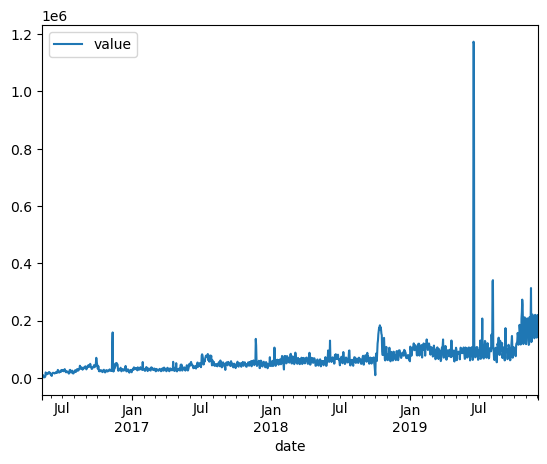

In [9]:
df.plot()

In [11]:
df['value'].quantile(0.025)

17876.4

In [13]:
df = df[(df['value']>=df['value'].quantile(0.025)) & (df['value']<=df['value'].quantile(0.975))]

<AxesSubplot:xlabel='date'>

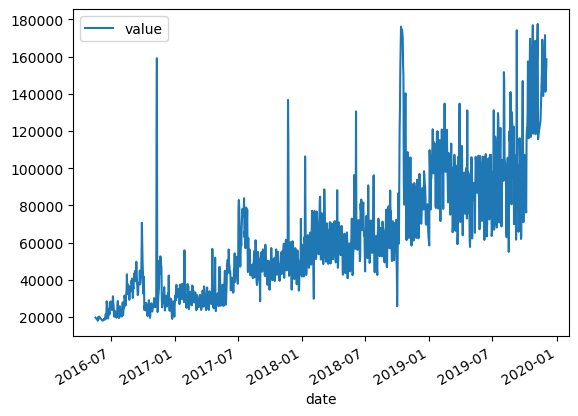

In [14]:
df.plot()

Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

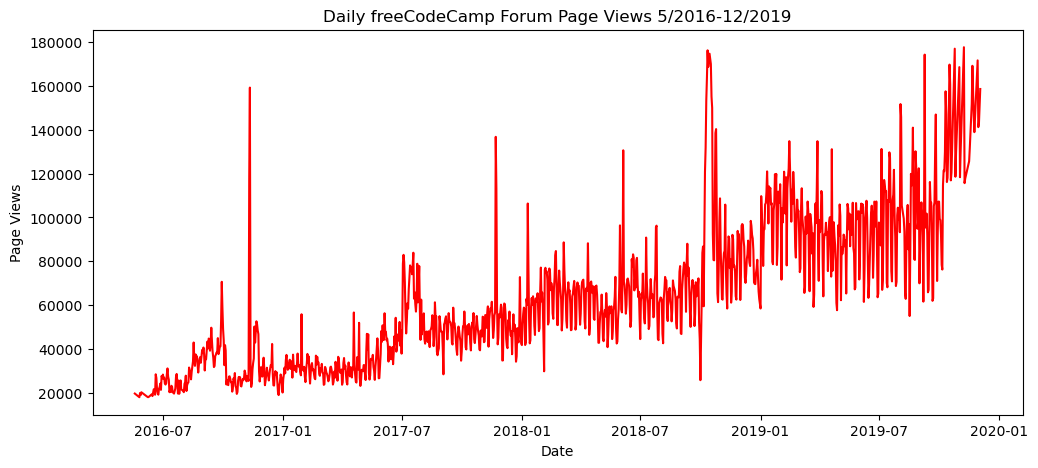

In [28]:
fig, ax = plt.subplots(figsize=(12,5), dpi=100)
ax.plot(df, color='red')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

In [47]:
df.index.month

Int64Index([ 5,  5,  5,  5,  5,  6,  6,  6,  6,  6,
            ...
            11, 11, 11, 11, 11, 11, 11, 11, 12, 12],
           dtype='int64', name='date', length=1238)

In [145]:
df3 = df.groupby([df.index.year, df.index.month]).mean()
df3, df3.shape

(                   value
 date date               
 2016 5      19432.400000
      6      21875.105263
      7      24109.678571
      8      31049.193548
      9      41476.866667
      10     27398.322581
      11     40448.633333
      12     27832.419355
 2017 1      32785.161290
      2      31113.071429
      3      29369.096774
      4      30878.733333
      5      34244.290323
      6      43577.500000
      7      65806.838710
      8      47712.451613
      9      47376.800000
      10     47438.709677
      11     57701.566667
      12     48420.580645
 2018 1      58580.096774
      2      65679.000000
      3      62693.774194
      4      62350.833333
      5      56562.870968
      6      70117.000000
      7      63591.064516
      8      62831.612903
      9      65941.733333
      10    111378.142857
      11     78688.333333
      12     80047.483871
 2019 1     102056.516129
      2     105968.357143
      3      91214.483871
      4      89368.433333
      5     

In [149]:
df3.index = df3.index.set_names(['Year', 'Month'])
df3.reset_index(inplace=True)
df3, df3.shape

(    Year  Month          value
 0   2016      5   19432.400000
 1   2016      6   21875.105263
 2   2016      7   24109.678571
 3   2016      8   31049.193548
 4   2016      9   41476.866667
 5   2016     10   27398.322581
 6   2016     11   40448.633333
 7   2016     12   27832.419355
 8   2017      1   32785.161290
 9   2017      2   31113.071429
 10  2017      3   29369.096774
 11  2017      4   30878.733333
 12  2017      5   34244.290323
 13  2017      6   43577.500000
 14  2017      7   65806.838710
 15  2017      8   47712.451613
 16  2017      9   47376.800000
 17  2017     10   47438.709677
 18  2017     11   57701.566667
 19  2017     12   48420.580645
 20  2018      1   58580.096774
 21  2018      2   65679.000000
 22  2018      3   62693.774194
 23  2018      4   62350.833333
 24  2018      5   56562.870968
 25  2018      6   70117.000000
 26  2018      7   63591.064516
 27  2018      8   62831.612903
 28  2018      9   65941.733333
 29  2018     10  111378.142857
 30  201

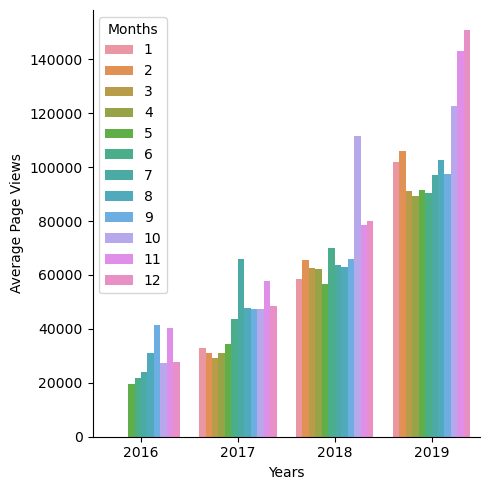

In [176]:
ax = sns.catplot(data=df3, x='Year', y='value', kind='bar', hue="Month", legend=None)
ax.set(xlabel='Years', ylabel='Average Page Views')
plt.legend(title='Months')

In [178]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


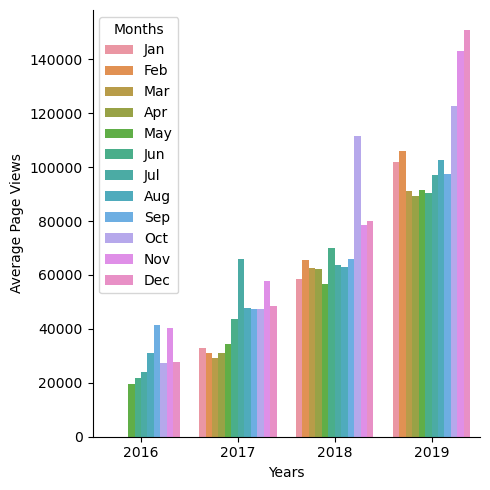

In [188]:
ax = sns.catplot(data=df_box, x='year', y='value', kind='bar',legend=None, hue="month", ci=None, hue_order=['Jan','Feb','Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set(xlabel='Years', ylabel='Average Page Views')
plt.legend(title='Months')